In [1]:
import torch
import torchvision

from model import G_NET, G_NET_not_CA
import os
import pickle as pkl
import numpy as np
from PIL  import Image
import matplotlib.pyplot as plt
import glob

In [2]:
batch_size =1
use_kl = False
data_dir = "/data/unagi0/ktokitake/birds_attngan"

In [6]:
netG_path = "birds_attn2_2020_08_06_18_31_01"
model_path = os.path.join(data_dir, "att_output", netG_path, "Model/netG_epoch_350.pth")

In [7]:
if use_kl:
    netG = G_NET()
else:
    netG = G_NET_not_CA()

In [8]:
state_dict = torch.load(model_path, map_location=lambda storage, loc: storage)
netG.load_state_dict(state_dict)
netG.eval()

G_NET_not_CA(
  (ca_net): CA_NET(
    (fc): Linear(in_features=312, out_features=400, bias=True)
    (relu): GLU()
  )
  (h_net1): INIT_STAGE_G_not_CA(
    (fc): Sequential(
      (0): Linear(in_features=412, out_features=16384, bias=False)
      (1): BatchNorm1d(16384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): GLU()
    )
    (upsample1): Sequential(
      (0): Upsample(scale_factor=2.0, mode=nearest)
      (1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): GLU()
    )
    (upsample2): Sequential(
      (0): Upsample(scale_factor=2.0, mode=nearest)
      (1): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): GLU()
    )
    (upsample3): Sequential(
      (0): Upsample(scale_factor=2.0, m

In [9]:
###load attribute###
att_dir = os.path.join(data_dir,"CUB_200_2011/attributes")
att_np = np.zeros((312, 200)) #for CUB
with open(att_dir+"/class_attribute_labels_continuous.txt", "r") as f:
    for ind, line in enumerate(f.readlines()):
        line = line.strip("\n")
        line = list(map(float, line.split()))
        att_np[:,ind] = line

In [10]:
#### get true images ### 
image_dir = os.path.join(data_dir, "CUB_200_2011/images")
image_list = os.listdir(image_dir)
id_to_class =  {} 
for f in image_list:
    cls_id = int(f.split(".")[0])
    id_to_class[cls_id] = f
    

In [11]:
with open(data_dir+"/test_seen/class_data.pickle", "rb") as f:
    test_seen_data = pkl.load(f)
with open(data_dir+"/test_unseen/class_data.pickle", "rb" ) as f:
    test_unseen_data = pkl.load(f)
    
test_seen_ids = test_seen_data["class_info"]
test_unseen_ids = test_unseen_data["class_info"]
print(test_seen_ids)
print(test_unseen_ids)

[2, 3, 15, 16, 20, 22, 47, 48, 67, 68, 69, 73, 74, 75, 76, 89, 90, 100, 149, 150, 1, 14, 34, 35, 101, 120, 110, 85, 8, 54, 171, 41, 56, 109, 187, 175, 30, 195, 51, 107, 117, 135, 134, 46, 147, 37, 160, 126, 137, 125, 27, 189, 197, 186, 158, 64, 44, 7, 183, 142, 86, 159, 81, 128, 11, 145, 29, 166, 59, 95, 155, 10, 141, 102, 79, 106, 192, 5, 83, 178, 162, 194, 196, 50, 39, 105, 36, 32, 146, 82, 60, 144, 199, 93, 198, 66, 99, 53, 151, 18, 152, 116, 61, 25, 24, 78, 17, 176, 58, 21, 193, 57, 40, 153, 88, 13, 118, 121, 179, 62, 154, 92, 38, 140, 182, 96, 172, 71, 42, 185, 177, 19, 65, 9, 112, 63, 6, 80, 181, 108, 122, 115, 184, 167, 129, 133, 114, 170, 131, 174]
[43, 111, 23, 98, 55, 130, 139, 123, 156, 124, 200, 72, 173, 28, 119, 165, 103, 180, 77, 12, 45, 190, 191, 138, 157, 52, 33, 164, 31, 143, 94, 70, 97, 91, 104, 127, 161, 49, 169, 148, 113, 87, 163, 136, 188, 84, 26, 4, 132, 168]


In [67]:
noise = torch.FloatTensor(batch_size, 100).normal_(0,1)
class_ind = 54###上のid-1の値を入力せよ
atts = np.zeros((batch_size, 312))
atts[0,:] = att_np[:, class_ind]
atts_np = np.random.randn(batch_size, 312)

#atts = np.zeros((batch_size, 312))
#noise = torch.zeros(batch_size, 100)
atts = torch.FloatTensor(atts)
atts_np_ts = torch.FloatTensor(atts_np)
print(noise)

tensor([[ 0.6216,  0.8206,  0.7777, -0.0551, -1.1832, -0.6403, -2.8205, -0.7416,
          0.1136,  0.6245,  0.8228,  0.0882,  0.8704,  0.1245, -0.8347, -1.1112,
         -0.8992,  1.5467,  0.6883,  1.1264, -0.4889, -1.0686, -0.6206,  1.6390,
         -0.1718,  0.4250,  0.0287, -2.2514, -0.3732,  1.9588,  0.3167,  1.0425,
         -0.8923, -0.5326,  1.5400,  1.2153,  0.4912,  2.6426, -0.0594, -0.1333,
         -1.0058, -1.6830, -0.0951,  0.2683,  1.3890, -0.9745, -1.1769,  0.2405,
          0.7407, -0.8219,  0.4755,  0.5274,  0.3088,  1.7274,  0.0670, -1.6617,
          0.0261,  1.8796,  0.9167, -0.5953,  1.6240,  0.6643, -2.3262, -0.9411,
         -0.8489,  1.2557,  0.9748,  0.3330,  0.0825, -1.5760,  0.5075,  0.6068,
         -1.2991, -0.7265,  0.2682,  0.4614, -0.4834,  2.7127, -0.4250,  0.1294,
          1.6050,  0.8259,  0.0771,  1.4878,  0.5486, -2.0258,  1.8500, -0.2037,
         -0.3735,  1.9478,  1.2619,  0.5308,  0.9241,  0.8328, -0.2253,  0.6097,
         -0.4750, -0.0029,  

In [68]:
if use_kl:
    fake_imgs, _, _ = netG(noise, atts)
else:
    fake_imgs = netG(noise, atts)

In [69]:
img_set = build_images(fake_imgs)

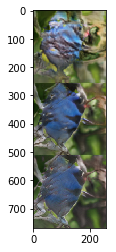

In [70]:
plt.imshow(img_set)

58


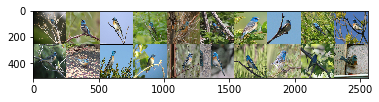

In [23]:
####get true images ### 
image_path = glob.glob(image_dir+"/" + id_to_class[class_ind+1]+"/*")
print(len(image_path))
images =[]
for i, f in enumerate(image_path):
    if i>=20:
        break
    img = Image.open(f).convert("RGB")
    img = torchvision.transforms.Scale((256,256))(img)
    img_np = np.array(img).astype(np.uint8)
    images.append(img_np)
    
image1 = np.concatenate(images[:10], axis=1)
image2 = np.concatenate(images[10:], axis=1)
img_set = np.concatenate([image1, image2], axis=0).astype(np.uint8)
img_set = Image.fromarray(img_set)
plt.figure()
plt.imshow(img_set)

In [16]:
###show image####
def build_images(fake_imgs):
    for i in range(len(fake_imgs)):
        fake_imgs[i] = fake_imgs[i].detach()
        fake_imgs[i] = fake_imgs[i].add_(1).div_(2).mul_(255)
        fake_imgs[i] = fake_imgs[i].numpy().astype(np.uint8)
        fake_imgs[i] = np.transpose(fake_imgs[i], (0,2,3,1))

    #img_set = []
    for img1, img2, img3 in zip(*fake_imgs):
        one_img=[]
        img1 = img1.repeat(4,axis=0).repeat(4,axis=1) #To arange image size
        img2 = img2.repeat(2,axis=0).repeat(2,axis=1)
        one_img.append(img1)
        one_img.append(img2)
        one_img.append(img3)
        one_img = np.concatenate(one_img, axis=0)
        #img_set.append(one_img)
        return one_img
    """
    img_set1 = np.concatenate(img_set[:10], axis=1)
    img_set2=[]
    if len(img_set) >10:
        img_set2 = np.concatenate(img_set[10:], axis=1)
    img_set = np.concatenate([img_set1, img_set2], axis=0)
    return img_set
    """